# Project 1 - Medical Appointment No Show Analysis

---

- This is the notebook file for our analysis. Each group member had 1-3 sections, and the individual notebooks were merged into this notebook for final submission.
- Data: https://www.kaggle.com/datasets/joniarroba/noshowappointments?select=KaggleV2-May-2016.csv
- What if that possible to predict someone to no-show an appointment?
- Group: EDDIE PELLISSIER, ERIC LIDIAK, ROSS BOERSMA, STEPHANIE ABEGG
  
---
 

## Load Cleaned Data for Analysis
See DataCleaning.ipynb for the data cleaning process.

In [1]:
# Dependencies and Setup
import pandas as pd
import hvplot.pandas
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.stats import linregress
import numpy as np
import time
import requests

# Read in data
df = pd.read_csv('data_cleaned.csv')
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,Scheduled_Day_Date,Scheduled_Hour,Scheduled_Day_of_Week,Scheduled_Month,Appointment_Day_Date,Appointment_Day_of_Week,Appointment_Month,Days_Between,lat,lon
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,...,2016-04-29,18,Friday,4,2016-04-29,Friday,4,0,-23.514826,-46.552112
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,...,2016-04-29,16,Friday,4,2016-04-29,Friday,4,0,-23.514826,-46.552112
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,...,2016-04-29,16,Friday,4,2016-04-29,Friday,4,0,-22.788662,-43.079799
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,...,2016-04-29,17,Friday,4,2016-04-29,Friday,4,0,-23.354233,-44.725856
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,...,2016-04-29,16,Friday,4,2016-04-29,Friday,4,0,-23.514826,-46.552112


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110526 entries, 0 to 110525
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Patient_ID               110526 non-null  float64
 1   Appointment_ID           110526 non-null  int64  
 2   Gender                   110526 non-null  object 
 3   Scheduled_Day            110526 non-null  object 
 4   Appointment_Day          110526 non-null  object 
 5   Age                      110526 non-null  int64  
 6   Neighbourhood            110526 non-null  object 
 7   Scholarship              110526 non-null  int64  
 8   Hypertension             110526 non-null  int64  
 9   Diabetes                 110526 non-null  int64  
 10  Alcoholism               110526 non-null  int64  
 11  Handicap                 110526 non-null  int64  
 12  SMS_Received             110526 non-null  int64  
 13  No_Show                  110526 non-null  object 
 14  No_S

## No Show Counts 
[ AUTHOR = STEPH ]

Twenty percent of patients miss their scheduled appointments. What factors cause this?

In [3]:
# Count no shows and attended
no_show_counts = df['No_Show'].value_counts()
no_show_counts

No_Show
No     88207
Yes    22319
Name: count, dtype: int64

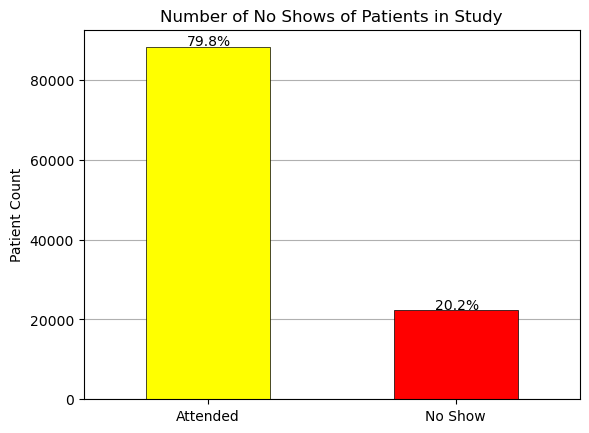

In [4]:
# Bar chart of no shows and attended
ax = no_show_counts.plot(kind = 'bar', 
        xlabel = '',
        ylabel = 'Patient Count',
        title = 'Number of No Shows of Patients in Study',
        edgecolor = 'black',
        color = no_show_counts.replace({no_show_counts['No']: 'yellow', no_show_counts['Yes']: 'red'}),
        linewidth = 0.5,
        rot = 0,
        )
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_xticklabels(['Attended','No Show'])

# Add percent lables to bars
no_show_percent = [round(100*no_show_counts['No'] / len(df['No_Show']),1), 
                  round(100*no_show_counts['Yes'] / len(df['No_Show']),1)]
i = 0
for p in ax.patches:
    ax.annotate(str(no_show_percent[i])  + '%', (p.get_x()  + p.get_width()/3, p.get_height() * 1.005))
    i += 1

# Save the figure
plt.savefig("output/Num_no_shows_bar.png")
# Show figure
plt.show()

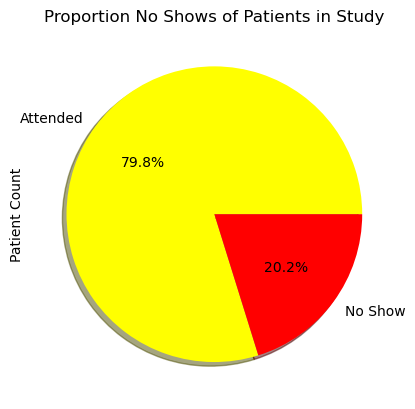

In [5]:
# Pie graph of no shows and attended
labels = ['Attended','No Show']
colors = ['yellow','red']
ax = no_show_counts.plot(kind = 'pie', 
        xlabel = '',
        ylabel = 'Patient Count',
        title = 'Proportion No Shows of Patients in Study',
        colors = colors,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        )

# Save the figure
plt.savefig("output/Num_no_shows_pie.png")
# Show figure
plt.show()

## Demographics: Age

[ AUTHOR = EDDIE ]

- Does age play a role in missed appointments?

Conclusions:
- It appears that no-show rates drop significantly after the age of 50.
- This could be due to several factors, the obvious one being that more issues crop up when you age--one is probably more likely to skip a checkup at 35 than skipping one at 55.
- Individuals are also more likely to have other issues that require specialist attention when they age, which is a futher incentive to attend appointments.
- We also see that children are more likely to attend than adults who are younger than 50, most likely for similar reasons as the older population in some respects.
- Children have in general more health issues than adults, but we also need to note that they're (in most cases) not responsible for their own attendance.
- Parents are more likely to ensure their children attend their appointments than ensuring that they attend their own. 

### Age distribution

/var/folders/gy/21jkj99n1zjfb6rz1yhctrbw0000gn/T/ipykernel_59742/1654274061.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_age_group=df.groupby('Age_Group')


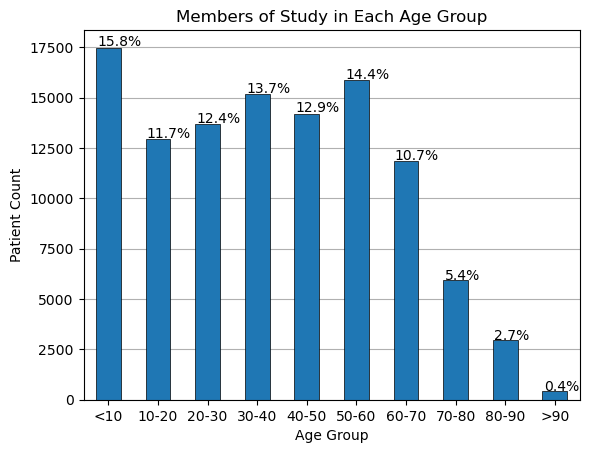

In [74]:
# Separating age groups with bins, counting how many people in each age group, plotting by percentage
group_by_age = df.groupby('Age')
bins = [0,10,20,30,40,50,60,70,80,90,120]
labels=['<10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','>90']
df['Age_Group']=pd.cut(df['Age'], bins=bins, labels=labels, right=False)
grouped_by_age_group=df.groupby('Age_Group')
num_age_group=df['Age_Group'].value_counts().sort_index()
ax = num_age_group.plot(kind = 'bar',
            xlabel = 'Age Group',
            ylabel = 'Patient Count',
            title = 'Members of Study in Each Age Group',
            edgecolor = 'black',
            rot = 0,
            linewidth=.5,
            )

ax.grid(axis='y')
ax.set_axisbelow(True)

# Add percent lables to bars
total_count = len(df['Age_Group'])
age_group_percent = [round(100 * count / total_count, 1) for count in num_age_group]
i=0
for p in ax.patches:
    ax.annotate(f"{age_group_percent[i]}%", (p.get_x() + p.get_width() / 20, p.get_height() * 1.005))
    i += 1
    
# Save the figure
plt.savefig("output/Age_distribution.png")
# Show figure
plt.show()

In [7]:
# Calculating average age in the study
mean_age=df['Age'].mean()
median_age=df['Age'].median()
print(f"the mean age is {mean_age}")
print(f"the median age is {median_age}")

the mean age is 37.089218826339504
the median age is 37.0


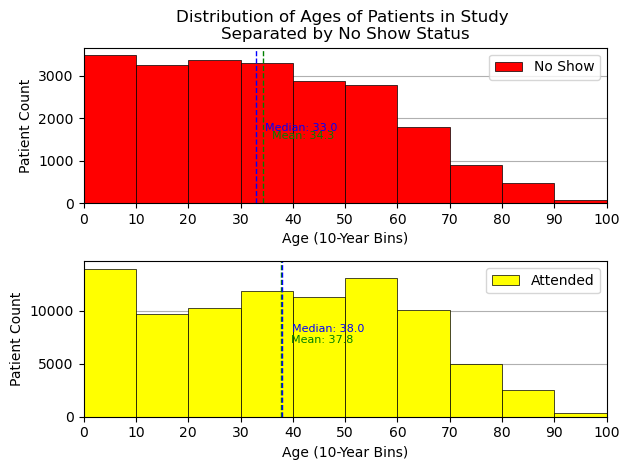

In [8]:
# Distribution of ages of patients in study, separated by no show and attended
fig, ax = plt.subplots(nrows=2, ncols=1)

# Bin data into 5-year age increments
xticks = np.arange(0,120,10).tolist()
bins = np.arange(0,120,10).tolist()

# No shows
df[df['No_Show_Boolean']==True].plot(ax=ax[0],
        kind = 'hist', 
        y = 'Age', 
        xlabel = 'Age (10-Year Bins)',
        ylabel = 'Patient Count',
        title = 'Distribution of Ages of Patients in Study \nSeparated by No Show Status',
        edgecolor = 'black',
        linewidth = 0.5,
        xlim = [0,100],
        xticks = xticks,
        bins  = bins,
        color = 'red',
        label = 'No Show'
        )
# Add vertical lines for average and median 
avg = df[df['No_Show_Boolean']==True]['Age'].mean()
ax[0].axvline(avg, color='green', linestyle='dashed', linewidth=1)
ax[0].text(avg*1.05, 1500, 'Mean: {:.1f}'.format(avg), fontsize = 8, color='green')
med = df[df['No_Show_Boolean']==True]['Age'].median()
ax[0].axvline(med, color='blue', linestyle='dashed', linewidth=1)
ax[0].text(med*1.05, 1700, 'Median: {:.1f}'.format(med), fontsize = 8, color='blue')
ax[0].grid(axis='y')
ax[0].set_axisbelow(True)

# Attended
df[df['No_Show_Boolean']==False].plot(ax=ax[1],
        kind = 'hist', 
        y = 'Age', 
        xlabel = 'Age (10-Year Bins)',
        ylabel = 'Patient Count',
        # title = 'Distribution of Ages of Patients in Study \nSeparated by No Show Status',
        edgecolor = 'black',
        linewidth = 0.5,
        xlim = [0,100],
        xticks = xticks,
        bins  = bins,
        color = 'yellow',
        label = 'Attended'
        )

# Add vertical lines for average and median 
avg = df[df['No_Show_Boolean']==False]['Age'].mean()
ax[1].axvline(avg, color='green', linestyle='dashed', linewidth=1)
ax[1].text(avg*1.05, 7000, 'Mean: {:.1f}'.format(avg), fontsize = 8, color='green')
med = df[df['No_Show_Boolean']==False]['Age'].median()
ax[1].axvline(med, color='blue', linestyle='dashed', linewidth=1)
ax[1].text(med*1.05, 8000, 'Median: {:.1f}'.format(med), fontsize = 8, color='blue')
ax[1].grid(axis='y')
ax[1].set_axisbelow(True)

plt.tight_layout()

# Save the figure
plt.savefig("output/Age_distribution_separated.png")
# Show figure
plt.show()

### No Shows by Age

In [9]:
# How many shows vs no shows per age group
no_shows_by_age_group= df.groupby('Age_Group')['No_Show'].value_counts()
no_shows_by_age_group = no_shows_by_age_group.reset_index()
no_shows_by_age_group

/var/folders/gy/21jkj99n1zjfb6rz1yhctrbw0000gn/T/ipykernel_59742/2337171909.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_shows_by_age_group= df.groupby('Age_Group')['No_Show'].value_counts()


,Age_Group,No_Show,count
0,<10,No,13991
1,<10,Yes,3484
2,10-20,No,9679
3,10-20,Yes,3257
4,20-30,No,10319
5,20-30,Yes,3380
6,30-40,No,11871
7,30-40,Yes,3300
8,40-50,No,11329
9,40-50,Yes,2880


In [10]:
# Proportion of no shows by age group
no_shows_by_age_group_merged = pd.merge(no_shows_by_age_group, num_age_group, how = 'left', on='Age_Group')
no_shows_by_age_group_merged['Proportion'] = no_shows_by_age_group_merged['count_x'] / no_shows_by_age_group_merged['count_y']
no_shows_by_age_group_merged.rename(columns={'count_x' : 'Count', 'count_y' : 'Total'},inplace=True)
no_shows_by_age_group_merged

,Age_Group,No_Show,Count,Total,Proportion
0,<10,No,13991,17475,0.800629
1,<10,Yes,3484,17475,0.199371
2,10-20,No,9679,12936,0.748222
3,10-20,Yes,3257,12936,0.251778
4,20-30,No,10319,13699,0.753267
5,20-30,Yes,3380,13699,0.246733
6,30-40,No,11871,15171,0.782480
7,30-40,Yes,3300,15171,0.217520
8,40-50,No,11329,14209,0.797312
9,40-50,Yes,2880,14209,0.202688


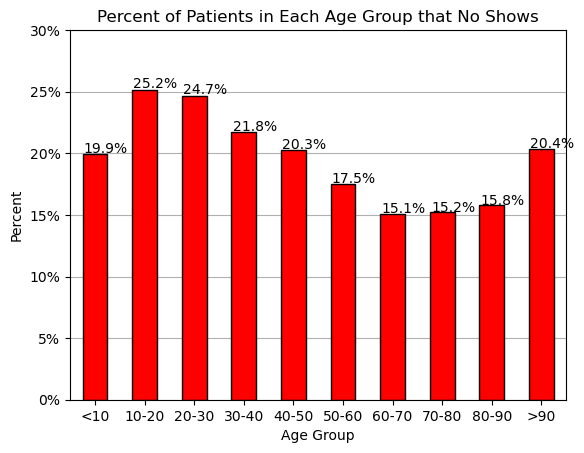

In [11]:
# Plotting proportions
ax = no_shows_by_age_group_merged[no_shows_by_age_group_merged['No_Show']=='Yes'].plot(kind = 'bar',
                                                                                 x='Age_Group',
                                                                                 y='Proportion',
                                                                                 xlabel= 'Age Group',
                                                                                 ylabel= 'Percent',
                                                                                 title = 'Percent of Patients in Each Age Group that No Shows',
                                                                                 edgecolor = 'black',
                                                                                 color = 'red',
                                                                                 rot= 0,
                                                                                legend=False
                                                                                )
ax.grid(axis='y')
ax.set_axisbelow(True)
vals = ax.get_yticks() 
ax.set_yticks(vals)
ax.set_yticklabels(['{:,.0%}'.format(ytick) for ytick in vals])

# Add percent lables to bars
for p in ax.patches:
    ax.annotate(str( round(p.get_height()*100,1) )  + '%', (p.get_x()  + p.get_width()/20, p.get_height() * 1.005))

# Save the figure
plt.savefig("output/no_show_proportions_in_each_age_group.png")
# Show figure
plt.show()

## Demographics: Gender

[ AUTHOR = EDDIE ]

- Does gender play a role in missed appointments?

Conclusions:

- Although our sample was overwhelmingly skewed towards female participants, it does not appear that there is any significance when comparing the genders' no-show rates.

### Gender distribution

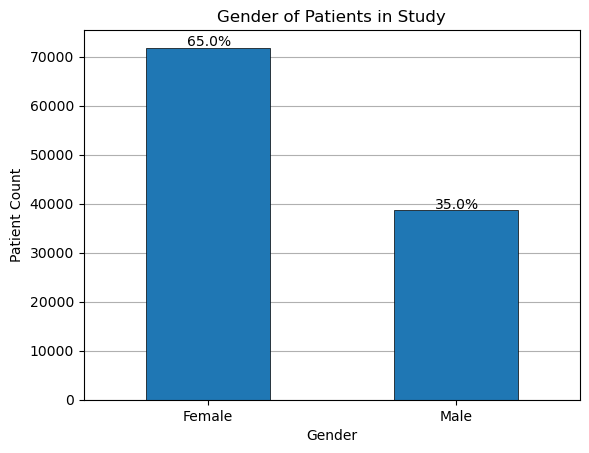

In [12]:
# Plotting number of genders ratio
grouped_by_gender = df.groupby('Gender')
num_genders = df['Gender'].value_counts()
ax = num_genders.plot(kind = 'bar',
            xlabel = 'Gender',
            ylabel = 'Patient Count',
            title = 'Gender of Patients in Study',
            edgecolor = 'black',
            linewidth = 0.5,
            rot = 0,)
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_xticklabels(['Female','Male'])

# Add percent lables to bars
gender_percent = [round(100*num_genders['F'] / len(df['Gender']),2),
                                                   round(100*num_genders['M'] / len(df['Gender']),2)]
i=0
for p in ax.patches:
        ax.annotate(str(gender_percent[i]) + '%', (p.get_x() + p.get_width()/3, p.get_height() *1.005))
        i += 1

# Save the figure
plt.savefig("output/gender_of_patients.png")
# Show figure
plt.show()


### Proportion No Show by Gender

In [13]:
# Calculate number of no shows by gender
no_shows_by_gender = df.groupby('Gender')['No_Show'].value_counts()
no_shows_by_gender = no_shows_by_gender.reset_index()
no_shows_by_gender

,Gender,No_Show,count
0,F,No,57245
1,F,Yes,14594
2,M,No,30962
3,M,Yes,7725


In [14]:
# Proportion of no shows by gender
no_shows_by_gender_merged = pd.merge(no_shows_by_gender, num_genders, how = 'left', on='Gender')
no_shows_by_gender_merged['Proportion'] = no_shows_by_gender_merged['count_x'] / no_shows_by_gender_merged['count_y']
no_shows_by_gender_merged.rename(columns={'count_x' : 'Count', 'count_y' : 'Total'},inplace=True)
no_shows_by_gender_merged

,Gender,No_Show,Count,Total,Proportion
0,F,No,57245,71839,0.796851
1,F,Yes,14594,71839,0.203149
2,M,No,30962,38687,0.800321
3,M,Yes,7725,38687,0.199679


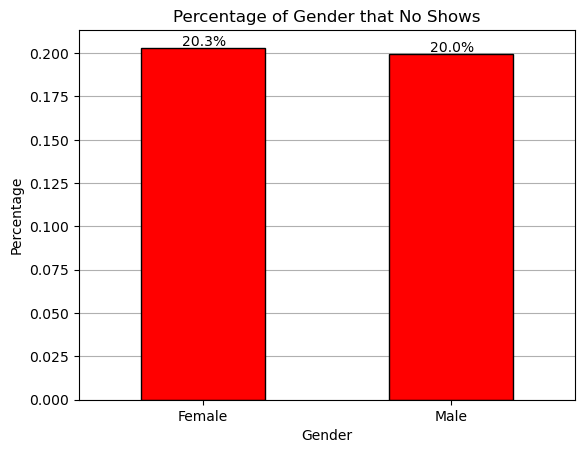

In [15]:
# Bar plot
ax = no_shows_by_gender_merged[no_shows_by_gender_merged['No_Show']=='Yes'].plot(kind = 'bar',
                                                                                 x='Gender',
                                                                                 y='Proportion',
                                                                                 xlabel= 'Gender',
                                                                                 ylabel= 'Percentage',
                                                                                 title = 'Percentage of Gender that No Shows',
                                                                                 edgecolor = 'black',
                                                                                 color = 'red',
                                                                                 rot= 0,
                                                                                 legend=False
                                                                                )
ax.grid(axis='y')
ax.set_axisbelow(True)                                                                          
ax.set_xticklabels(['Female','Male'])

# Add percent lables to bars
for p in ax.patches:
    ax.annotate(str( round(p.get_height()*100,1) )  + '%', (p.get_x()  + p.get_width()/3, p.get_height() * 1.005))                                                                                
                                                                                                                                                         
# Save the figure
plt.savefig("output/no_show_proportions_for_each_gender.png")
# Show figure
plt.show()

## Demographics: Welfare

[ AUTHOR = EDDIE ]

- Are people on scholarship (welfare) more or less likely to miss appointments?

Conclusions:

- We see that participants in the program, although provided with incentive to attend appoinments, actually miss appointments at a higher rate than those who are not participants. 
- While on the surface this may seem counterintuitive, it highlights that these extremely low-income people have many other barriers that most likely are preventing them from attending at the same rate. 

### Welfare distribution

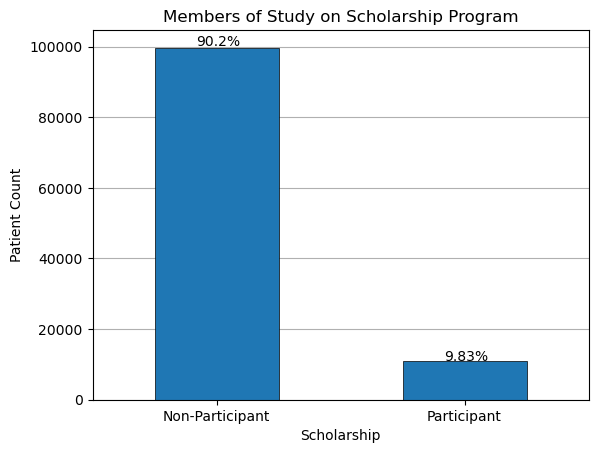

In [16]:
# Plotting ratio of members of study that are part of scholarship program
grouped_by_scholarship = df.groupby('Scholarship')
num_scholarship = df['Scholarship'].value_counts()
ax = num_scholarship.plot(kind = 'bar',
            xlabel = 'Scholarship',
            ylabel = 'Patient Count',
            title = 'Members of Study on Scholarship Program',
            edgecolor = 'black',
            linewidth = 0.5,
            rot = 0,
            )
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_xticklabels(['Non-Participant','Participant'])

# Add percent lables to bars
scholarship_percent = [round(100*num_scholarship[0] / len(df['Scholarship']),1),
                                                   round(100*num_scholarship[1] / len(df['Scholarship']),2)]
i=0
for p in ax.patches:
        ax.annotate(str(scholarship_percent[i]) + '%', (p.get_x() + p.get_width()/3, p.get_height() *1.005))
        i += 1

# Save the figure
plt.savefig("output/members_of_study_in_scholarship_program.png")
# Show figure
plt.show()

### Proportion No Show by Welfare

In [17]:
# Calculate number of no shows by scholarship status
no_shows_by_scholarship = df.groupby('Scholarship')['No_Show'].value_counts()
no_shows_by_scholarship = no_shows_by_scholarship.reset_index()
no_shows_by_scholarship

,Scholarship,No_Show,count
0,0,No,79924
1,0,Yes,19741
2,1,No,8283
3,1,Yes,2578


In [18]:
# Proportion of no shows by scholarship
no_shows_by_scholarship_merged = pd.merge(no_shows_by_scholarship, num_scholarship, how = 'left', on='Scholarship')
no_shows_by_scholarship_merged['Proportion'] = no_shows_by_scholarship_merged['count_x'] / no_shows_by_scholarship_merged['count_y']
no_shows_by_scholarship_merged.rename(columns={'count_x' : 'Count', 'count_y' : 'Total'},inplace=True)
no_shows_by_scholarship_merged

,Scholarship,No_Show,Count,Total,Proportion
0,0,No,79924,99665,0.801926
1,0,Yes,19741,99665,0.198074
2,1,No,8283,10861,0.762637
3,1,Yes,2578,10861,0.237363


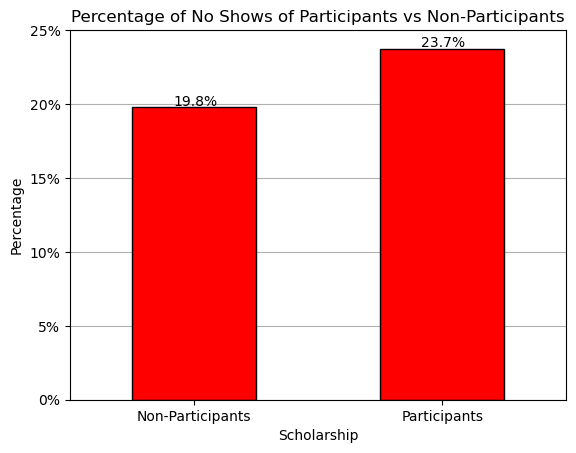

In [19]:
# Bar graph proportion no shows 
ax = no_shows_by_scholarship_merged[no_shows_by_scholarship_merged['No_Show']=='Yes'].plot(kind = 'bar',
                                                                                 x='Scholarship',
                                                                                 y='Proportion',
                                                                                 xlabel= 'Scholarship',
                                                                                 ylabel= 'Percentage',
                                                                                 title = 'Percentage of No Shows of Participants vs Non-Participants',
                                                                                 edgecolor = 'black',
                                                                                 color = 'red',
                                                                                 rot= 0,
                                                                                legend=False
                                                                                )
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.annotate
ax.set_xticklabels(['Non-Participants','Participants'])
vals = ax.get_yticks() 
ax.set_yticks(vals)
ax.set_yticklabels(['{:,.0%}'.format(ytick) for ytick in vals])

# Add percent lables to bars
for p in ax.patches:
    ax.annotate(str( round(p.get_height()*100,1) )  + '%', (p.get_x()  + p.get_width()/3, p.get_height() * 1.005))

# Save the figure
plt.savefig("output/no_show_proportions_in_scholarship_program.png")
# Show figure
plt.show()


## Demographics: Location

[ AUTHOR = STEPH ]

BONUS POINTS FOR USING AN API!!

- Does location play a role in missed appointments?

Conclusions:

- People in areas of greater population density are more likely to miss appointments.

In [20]:
# List of neighborhoods
neighborhoods = df['Neighbourhood'].unique().tolist()

In [21]:
# Create neighborhoods dataframe
neighborhood_df = df[["Neighbourhood","lat","lon"]]
neighborhood_df = neighborhood_df.drop_duplicates()
neighborhood_df = neighborhood_df.reset_index()
neighborhood_df.drop(columns=['index'], inplace=True)
neighborhood_df

,Neighbourhood,lat,lon
0,JARDIM DA PENHA,-23.514826,-46.552112
1,MATA DA PRAIA,-22.788662,-43.079799
2,PONTAL DE CAMBURI,-23.354233,-44.725856
3,REPÚBLICA,-20.269941,-40.293034
4,GOIABEIRAS,-20.270612,-40.302859
...,...,...,...
76,FRADINHOS,-20.307131,-40.326980
77,NAZARETH,-20.310290,-40.316110
78,AEROPORTO,-3.775718,-38.527795
79,ILHAS OCEÂNICAS DE TRINDADE,-23.350815,-44.724037


In [22]:
# Number of patients per neighborhood, to add to neighborhoods dataframe
num_patients_per_neighborhoood = df['Neighbourhood'].value_counts()
num_patients_per_neighborhoood = pd.DataFrame(num_patients_per_neighborhoood)
num_patients_per_neighborhoood = num_patients_per_neighborhoood.reset_index()
num_patients_per_neighborhoood.rename(columns={'count':'Patient_Count'},inplace=True)
num_patients_per_neighborhoood

,Neighbourhood,Patient_Count
0,JARDIM CAMBURI,7717
1,MARIA ORTIZ,5805
2,RESISTÊNCIA,4431
3,JARDIM DA PENHA,3877
4,ITARARÉ,3514
...,...,...
76,ILHA DO BOI,35
77,ILHA DO FRADE,10
78,AEROPORTO,8
79,ILHAS OCEÂNICAS DE TRINDADE,2


In [23]:
# No Show proportion per neighborhood, to add to neighborhoods dataframe
no_shows_per_neighborhoood = pd.DataFrame(df.groupby("Neighbourhood")["No_Show_Boolean"].mean())
no_shows_per_neighborhoood = no_shows_per_neighborhoood.reset_index()
no_shows_per_neighborhoood.rename(columns={'No_Show_Boolean':'No_Show_Proportion'},inplace=True)
no_shows_per_neighborhoood

,Neighbourhood,No_Show_Proportion
0,AEROPORTO,0.125000
1,ANDORINHAS,0.230327
2,ANTÔNIO HONÓRIO,0.184502
3,ARIOVALDO FAVALESSA,0.219858
4,BARRO VERMELHO,0.215130
...,...,...
76,SÃO JOSÉ,0.216490
77,SÃO PEDRO,0.210376
78,TABUAZEIRO,0.182950
79,UNIVERSITÁRIO,0.210526


In [24]:
# Merge patients per neighborhood into neigborhoods dataframe
neighborhood_df = pd.merge(neighborhood_df, num_patients_per_neighborhoood, how = 'left', on = 'Neighbourhood')

In [25]:
# Merge no shows per neighborhood into neigborhoods dataframe
neighborhood_df = pd.merge(neighborhood_df, no_shows_per_neighborhoood, how = 'left', on = 'Neighbourhood')

In [26]:
# Neigborhoods dataframe for map plot
neighborhood_df

,Neighbourhood,lat,lon,Patient_Count,No_Show_Proportion
0,JARDIM DA PENHA,-23.514826,-46.552112,3877,0.162755
1,MATA DA PRAIA,-22.788662,-43.079799,644,0.170807
2,PONTAL DE CAMBURI,-23.354233,-44.725856,69,0.173913
3,REPÚBLICA,-20.269941,-40.293034,835,0.171257
4,GOIABEIRAS,-20.270612,-40.302859,700,0.195714
...,...,...,...,...,...
76,FRADINHOS,-20.307131,-40.326980,258,0.186047
77,NAZARETH,-20.310290,-40.316110,135,0.214815
78,AEROPORTO,-3.775718,-38.527795,8,0.125000
79,ILHAS OCEÂNICAS DE TRINDADE,-23.350815,-44.724037,2,1.000000


In [27]:
# Map of neighborhoods, sized by patient count and colored by no show proportion
neighborhood_map = neighborhood_df.hvplot.points(
    "lon",
    "lat",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size = "Patient_Count",
    scale = .5,
    color = "No_Show_Proportion",
    cmap = "tab20", # https://holoviews.org/user_guide/Colormaps.html#Styling_Plots.html
    hover_cols = ["Patient_Count", "No_Show_Proportion"],
    title = "Patient Neighborhoods, Sized by Patient Count and Colored by No Show Proportion"
)

# Save the map as html file
hvplot.save(neighborhood_map, "output/No_shows_by_neighborhood.html")
# Display the map plot
neighborhood_map

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [lon,lat]   (No_Show_Proportion,Patient_Count)

## SMS Received

[ AUTHOR = ROSS ]

- What impact does the SMS received play in missed appointments?

Conclusions: 
- People who received an SMS were actually more likely to miss appointments. Perhaps this has to do with the type of people who opt out of SMS notifications (i.e. they are more likely to make their appointment).

In [28]:
# Count the number of patients who received SMS messages
# count_0 = no SMS Received
# count_1 = SMS Received
count_0 = (df['SMS_Received'] == 0).sum()
count_1 = (df['SMS_Received'] == 1).sum()

# Print the values of each
print("SMS Opt In:", count_0)
print("SMS Opt Out:", count_1)

SMS Opt In: 75044
SMS Opt Out: 35482


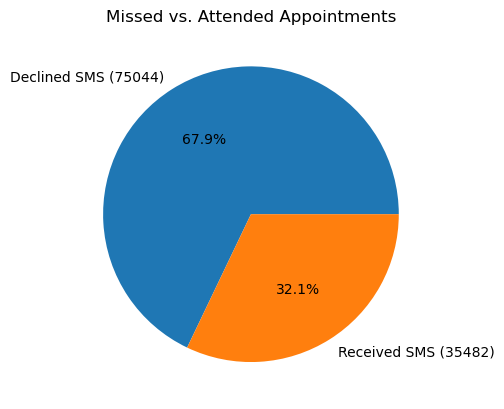

In [29]:
# Total Attended vs Missed Appointments
labels = ['Declined SMS (75044)', 'Received SMS (35482)']

missed_vs_attend = [75044, 35482]
total_appointments = sum(missed_vs_attend)

plt.pie(missed_vs_attend, labels=labels, autopct='%1.1f%%')
plt.title('Missed vs. Attended Appointments')

# Save the figure
plt.savefig("output/sms_1.png")
# Show figure
plt.show()

In [30]:
# Create a DataFrame called 'SMS_Summary' 
sms_summary = df.groupby(['SMS_Received', 'No_Show'])['Appointment_ID'].count()
sms_summary

SMS_Received  No_Show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
Name: Appointment_ID, dtype: int64

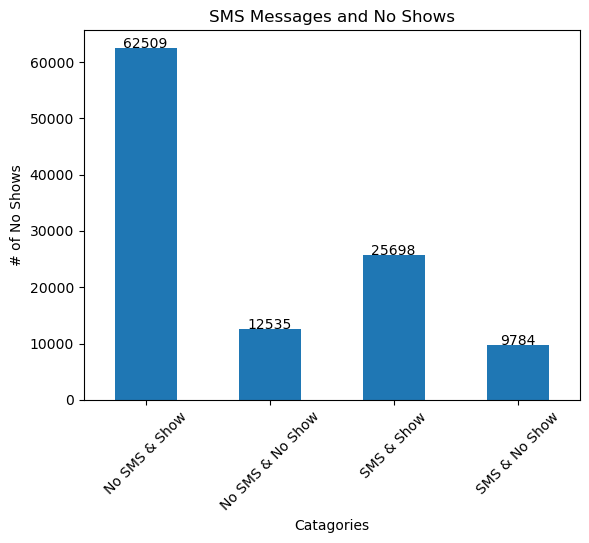

In [31]:
# Creating a Bar Graph to show the totals for each of these values
# Customizing x-axis labels
custom_ticks_x = [0,1,2,3]
custom_labels_x = ['No SMS & Show', 'No SMS & No Show', 'SMS & Show', 'SMS & No Show']

# Customize the bar graph
sms_summary.plot.bar(title='SMS Messages and No Shows',
                     ylabel='# of No Shows',
                     xlabel='Catagories')
plt.xticks(custom_ticks_x, custom_labels_x, rotation=45)

# Annotate the number on top of each bar
for i, v in enumerate(sms_summary):
    plt.text(i, v + 0.1, str(v), ha='center')
    
# Save the figure
plt.savefig("output/sms_2.png")
# Show figure
plt.show()


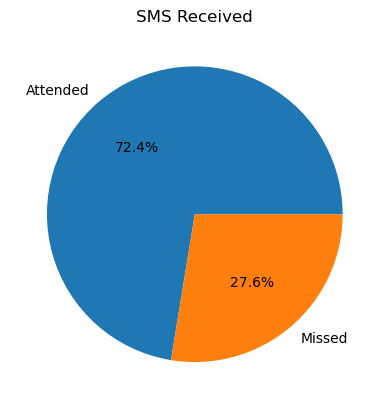

In [32]:
# Pie chart of Missed Appointments
labels = ['Attended', 'Missed']

sms_received = [25698, 9784]
total_sms_received = sum(sms_received)

plt.pie(sms_received, labels=labels, autopct='%1.1f%%')
plt.title('SMS Received')

# Save the figure
plt.savefig("output/sms_3.png")
# Show figure
plt.show()


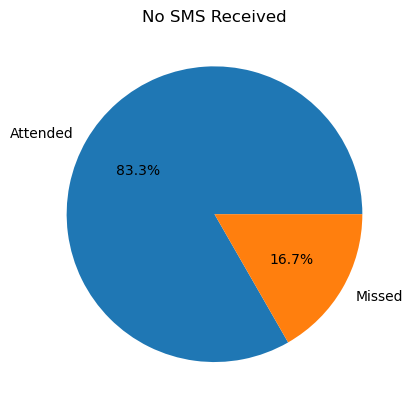

In [33]:
# Pie chart of Attended appointments
labels = ['Attended', 'Missed']

no_sms_received = [62509, 12535]
total_no_sms_received = sum(no_sms_received)

plt.pie(no_sms_received, labels=labels, autopct='%1.1f%%')
plt.title('No SMS Received')

# Save the figure
plt.savefig("output/sms_4.png")
# Show figure
plt.show()

## Condition Questions

[ AUTHOR = ERIC ]

- Do patients who answered positively to a condition question show up at a different rate than those who did not?

Conclusions: 
- People no condition (alcoholism, diabetes, hypertension, handicap) are more likle to miss appointments than those wiht a condition. Of those with a condition, people with hypertension are least likely to no show and people with alcoholism are most likley to no show.
- If a patient checks all 4 conditions they are most likely to be a no show (perhaps they are just the lazy type who checks boxes blindly and doesn't show up) and if they check 3 conditions they are most likely to show up (perhaps they are actually pretty sick, and the fact they selected only 3 indicates they are not blindly checking boxes like those who checked 4). The unchecked box (for those that had 3 conditions) was most often alcoholism or handicap.

### Distribution of Patients with/without Conditions

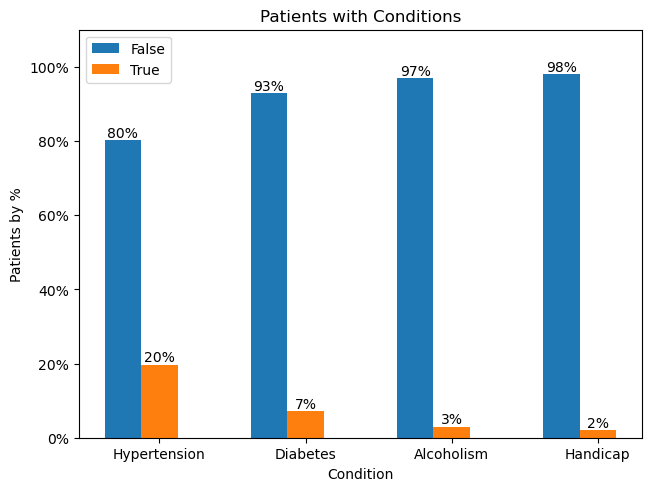

In [34]:
# All 4 conditions on one bar chart
hypertension_false = df["Hypertension"].value_counts(normalize='True')[0]
hypertension_true = df["Hypertension"].value_counts(normalize='True')[1]
diabetes_false =  df["Diabetes"].value_counts(normalize='True')[0]
diabetes_true =  df["Diabetes"].value_counts(normalize='True')[1]
alcoholism_false = df["Alcoholism"].value_counts(normalize='True')[0]
alcoholism_true = df["Alcoholism"].value_counts(normalize='True')[1]
handicap_false = df["Handicap"].value_counts(normalize='True')[0]
handicap_true = df["Handicap"].value_counts(normalize='True')[1]
#y_axis = df["No_Show_Boolean"].map(str)
#print(handicap)

# Round the values for graph
hypertension_false = round(hypertension_false,3)
hypertension_true = round(hypertension_true,3)
diabetes_false =  round(diabetes_false,3)
diabetes_true =  round(diabetes_true,3)
alcoholism_false = round(alcoholism_false,3)
alcoholism_true = round(alcoholism_true,3)
handicap_false = round(handicap_false,3)
handicap_true = round(handicap_true,3)

# Trying to get the values to string, not float
#hypertension_false = str(hypertension_false+'%')

conditions = ('Hypertension','Diabetes','Alcoholism','Handicap')

conditions_dict = {
    'False': (hypertension_false,diabetes_false,alcoholism_false,handicap_false),
    'True': (hypertension_true, diabetes_true, alcoholism_true, handicap_true )
}
x = np.arange(4)
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in conditions_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    
    # Suggested by Copilot
    fmt = '{x:,.0f}%'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)

    # Add percentage values on top of each bar
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '{:.0%}'.format(height), ha='center', va='bottom')
        
    multiplier += 1
    
# X ticks for true / false
plt.xticks(x + width, conditions)

plt.title("Patients with Conditions")
plt.ylabel("Patients by %")
plt.xlabel("Condition")

# Change format of yticks to percentages
vals = ax.get_yticks() 
ax.set_yticks(vals)
ax.set_yticklabels(['{:,.0%}'.format(ytick) for ytick in vals])
ax.set_ylim([0,1.1])
ax.legend()

# Save the figure
plt.savefig("output/Condition_distribution.png")
# Show figure
plt.show()

### Proportion No Shows with Conditions

In [35]:
# Proportion of no shows with conditions
prop_hypertension = df[df['Hypertension']==1]['No_Show_Boolean'].mean()
prop_diabetes = df[df['Diabetes']==1]['No_Show_Boolean'].mean()
prop_alcoholism = df[df['Alcoholism']==1]['No_Show_Boolean'].mean()
prop_handicap = df[df['Handicap']==1]['No_Show_Boolean'].mean()
prop_no_condition = df[ (df['Hypertension']==0) & (df['Diabetes']==0) & (df['Alcoholism']==0) & (df['Handicap']==0) ]['No_Show_Boolean'].mean()

# Assemble the resulting series into a single summary DataFrame
prop_no_show_conditions = {
                    'Hypertension': prop_hypertension, 
                    'Diabetes': prop_diabetes, 
                    'Alcoholism': prop_alcoholism, 
                    'Handicap': prop_handicap,
                    'No Condition': prop_no_condition                    
                    }
prop_no_show_conditions = pd.DataFrame(data = prop_no_show_conditions,index=[0])
prop_no_show_conditions = prop_no_show_conditions.transpose()
prop_no_show_conditions

,0
Hypertension,0.173020
Diabetes,0.180033
Alcoholism,0.201488
Handicap,0.181615
No Condition,0.209276


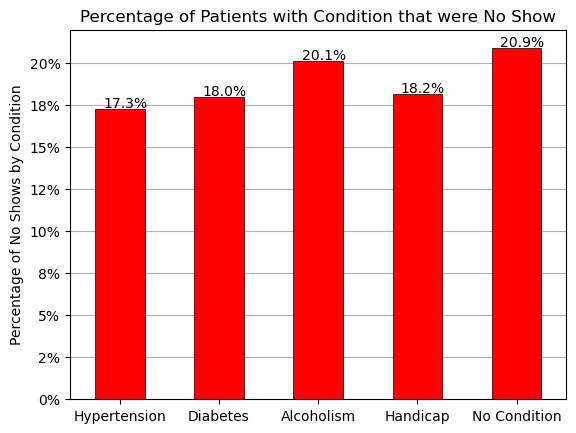

In [36]:
# Bar plot proportion of no shows by condition
ax = prop_no_show_conditions.plot(kind = 'bar',
                                     #xlabel = 'Condition',
                                     ylabel = 'Percentage of No Shows by Condition',
                                     title = 'Percentage of Patients with Condition that were No Show',
                                     edgecolor = 'black',
                                     color='red',
                                     linewidth = 0.5,
                                     rot = 0,
                                     label = 'No Show',
                                     #xticks = conditions
                                    )
ax.grid(axis='y')
ax.set_axisbelow(True)

# Change format of yticks to percentages
vals = ax.get_yticks() 
ax.set_yticks(vals)
ax.set_yticklabels(['{:,.0%}'.format(ytick) for ytick in vals])
ax.set_ylim([0,.22])

# Label bar heights
for p in ax.patches:
    ax.annotate(str( round(p.get_height()*100,1) )  + '%', (p.get_x()  + p.get_width()/6, p.get_height() * 1.005))

# Remove legend
ax.get_legend().remove()

# Save the figure
plt.savefig("output/No_shows_by_condition.png")
# Show figure
plt.show()

### Mutiple Conditions and No Shows

In [37]:
# Analyze no shows with multiple conditions
conditions = ['Hypertension','Diabetes','Alcoholism','Handicap']
conditions.append('No_Show_Boolean')
multiple_conditions_df = df[conditions]
multiple_conditions_df['Num_conditions'] =  multiple_conditions_df['Hypertension'] + multiple_conditions_df['Diabetes'] + multiple_conditions_df['Alcoholism'] + multiple_conditions_df['Handicap']
multiple_conditions_df = multiple_conditions_df.loc[multiple_conditions_df['Num_conditions']>0]
multiple_conditions_df

/var/folders/gy/21jkj99n1zjfb6rz1yhctrbw0000gn/T/ipykernel_59742/3161205035.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_conditions_df['Num_conditions'] =  multiple_conditions_df['Hypertension'] + multiple_conditions_df['Diabetes'] + multiple_conditions_df['Alcoholism'] + multiple_conditions_df['Handicap']


,Hypertension,Diabetes,Alcoholism,Handicap,No_Show_Boolean,Num_conditions
0,1,0,0,0,False,1
4,1,1,0,0,False,2
5,1,0,0,0,False,1
25,1,0,0,0,False,1
26,1,0,0,0,False,1
...,...,...,...,...,...,...
110482,1,0,0,0,False,1
110491,1,0,0,0,True,1
110495,1,0,0,0,True,1
110498,1,1,0,0,False,2


In [38]:
# Number of no shows with multiple conditions
num_no_show_one_cond = multiple_conditions_df[multiple_conditions_df['Num_conditions']==1]['No_Show_Boolean'].count()
num_no_show_two_cond = multiple_conditions_df[multiple_conditions_df['Num_conditions']==2]['No_Show_Boolean'].count()
num_no_show_three_cond = multiple_conditions_df[multiple_conditions_df['Num_conditions']==3]['No_Show_Boolean'].count()
num_no_show_four_cond = multiple_conditions_df[multiple_conditions_df['Num_conditions']==4]['No_Show_Boolean'].count()

# Assemble the resulting series into a single summary DataFrame
num_no_show_num_conditions = {
                    'One condition': num_no_show_one_cond, 
                    'Two conditions': num_no_show_two_cond, 
                    'Three conditions': num_no_show_three_cond, 
                    'Four conditions': num_no_show_four_cond,
                    }
num_no_show_num_conditions = pd.DataFrame(data = num_no_show_num_conditions,index=[0])
num_no_show_num_conditions = num_no_show_num_conditions.transpose()
num_no_show_num_conditions

,0
One condition,18123
Two conditions,7658
Three conditions,618
Four conditions,13


In [39]:
# Proportion of no shows with multiple conditions
prop_no_show_one_cond = multiple_conditions_df[multiple_conditions_df['Num_conditions']==1]['No_Show_Boolean'].mean()
prop_no_show_two_cond = multiple_conditions_df[multiple_conditions_df['Num_conditions']==2]['No_Show_Boolean'].mean()
prop_no_show_three_cond = multiple_conditions_df[multiple_conditions_df['Num_conditions']==3]['No_Show_Boolean'].mean()
prop_no_show_four_cond = multiple_conditions_df[multiple_conditions_df['Num_conditions']==4]['No_Show_Boolean'].mean()

# Assemble the resulting series into a single summary DataFrame
prop_no_show_num_conditions = {
                    'One condition': prop_no_show_one_cond, 
                    'Two conditions': prop_no_show_two_cond, 
                    'Three conditions': prop_no_show_three_cond, 
                    'Four conditions': prop_no_show_four_cond,
                    }
prop_no_show_num_conditions = pd.DataFrame(data = prop_no_show_num_conditions,index=[0])
prop_no_show_num_conditions = prop_no_show_num_conditions.transpose()
prop_no_show_num_conditions

,0
One condition,0.179275
Two conditions,0.178637
Three conditions,0.153722
Four conditions,0.307692


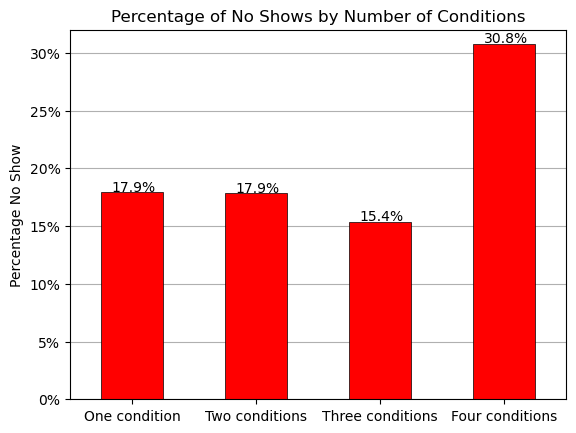

In [40]:
# Bar plot proportion of no shows by condition
ax = prop_no_show_num_conditions.plot(kind = 'bar',
                                     #xlabel = 'Condition',
                                     ylabel = 'Percentage No Show',
                                     title = 'Percentage of No Shows by Number of Conditions',
                                     edgecolor = 'black',
                                     color='red',
                                     linewidth = 0.5,
                                     rot = 0,
                                     label = 'No Show',
                                     #xticks = conditions
                                    )
ax.grid(axis='y')
ax.set_axisbelow(True)

# Change format of yticks to percentages
vals = ax.get_yticks() 
ax.set_yticks(vals)
ax.set_yticklabels(['{:,.0%}'.format(ytick) for ytick in vals])
ax.set_ylim([0,.32])

# Label bar heights
for p in ax.patches:
    ax.annotate(str( round(p.get_height()*100,1) )  + '%', (p.get_x()  + p.get_width()/6, p.get_height() * 1.005))

# Remove legend
ax.get_legend().remove()

# Save the figure
plt.savefig("output/No_shows_by_num_condition.png")
# Show figure
plt.show()

## No Shows vs. DateTime Stats

[ AUTHOR = STEPH ]

- Does a greater number of days between scheduling appointment and the appointment day result in a higher percentage of no shows? Is there an optimal time to schedule an appointment so you do not miss it?
- Is there a day of the week that has a higher volume of missed appointments? Is it more likely that appointments on Friday or Saturday have a higher proportion of no shows than midweek days?
- Does the day of week that an appointment is scheduled impact the chances of the patient showing up?
- Does the time of day that an appointment is scheduled impact the chances of the patient showing up?

Conclusions:
- see individual sections

### Days Between Scheduling Appointment and Appointment Day
Does a greater number of days between scheduling appointment and the appointment day result in a higher percentage of no shows? Is there an optimal time to schedule an appointment so you do not miss it?

Conclusions: 
- For no shows, median (mean) number of days between scheduling and appointment is 11 days (15.8 days)
- For attended, median (mean) number of days between scheduling and appointment is 2 days (8.8 days)
- So yes, no shows have a higher median and mean number of days between scheduling and appointment, suggesting that having fewer days between scheduling and appointment reduces the likelihood of no shows.
- When the number of days between scheduling and appointment is between 0-42 days, the percentage of no shows gradually increases as number of days between scheduling and appointment increase.
- When the number of days between scheduling and appointment is between 42-91 days, the percentage of no shows gradually decreases as number of days between scheduling and appointment increase. (Huh, wonder why?)
- After 91 days, the percentage of no shows varies quite a bit.
- Day-of appointments are least likely to have no-shows.
- It seems as if the optimal time to schedule an appointment is either 0-2 days or 80-90 days. Perhaps 3-month routine checkups don't see as many no shows.

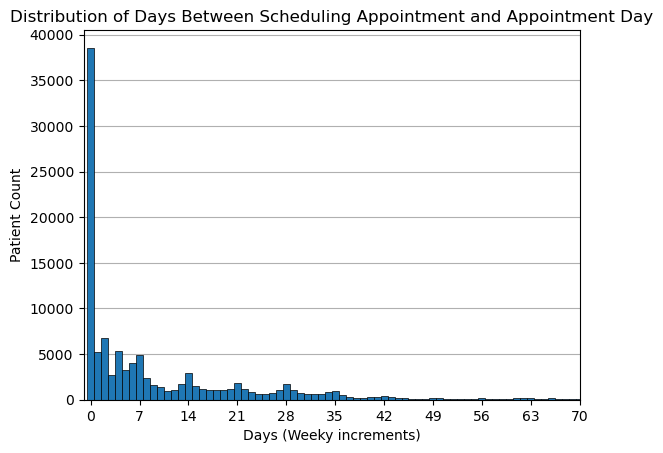

In [41]:
# Distribution of of days between scheduling appointment and appointment day
xticks = np.arange(0,71,7).tolist()
bins = np.arange(-.5,185,1).tolist()
ax = df.plot(kind = 'hist', 
        y = 'Days_Between', 
        xlabel = 'Days (Weeky increments)',
        ylabel = 'Patient Count',
        title = 'Distribution of Days Between Scheduling Appointment and Appointment Day',
        edgecolor = 'black',
        linewidth = 0.5,
        xlim = [-1,70],
        xticks = xticks,
        bins = bins,
        )
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.get_legend().remove()

# Save the figure
plt.savefig("output/Days_between_distribution.png")
# Show figure
plt.show()

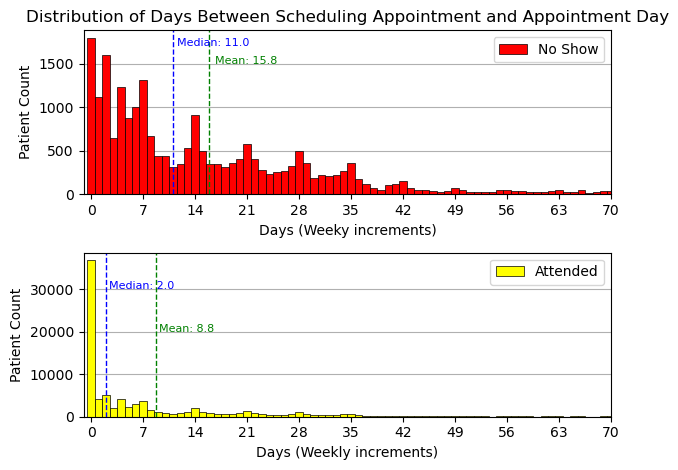

In [42]:
# Distribution of days between scheduling appointment and appointment day, separated by no show and attended
fig, ax = plt.subplots(nrows=2, ncols=1)

# No Shows
xticks = np.arange(0,71,7).tolist()
bins = np.arange(-.5,185,1).tolist()
df[df['No_Show_Boolean']==True].plot(ax=ax[0],
        kind = 'hist', 
        y = 'Days_Between', 
        xlabel = 'Days (Weeky increments)',
        ylabel = 'Patient Count',
        title = 'Distribution of Days Between Scheduling Appointment and Appointment Day',
        edgecolor = 'black',
        linewidth = 0.5,
        xlim = [-1,70],
        xticks = xticks,
        bins  = bins,
        color = 'red',
        label = 'No Show'
        )
# Add vertical lines for average and median 
avg = df[df['No_Show_Boolean']==True]['Days_Between'].mean()
ax[0].axvline(avg, color='green', linestyle='dashed', linewidth=1)
ax[0].text(avg*1.05, 1500, 'Mean: {:.1f}'.format(avg), fontsize = 8, color='green')
med = df[df['No_Show_Boolean']==True]['Days_Between'].median()
ax[0].axvline(med, color='blue', linestyle='dashed', linewidth=1)
ax[0].text(med*1.05, 1700, 'Median: {:.1f}'.format(med), fontsize = 8, color='blue')
ax[0].grid(axis='y')
ax[0].set_axisbelow(True)

# Attended
df[df['No_Show_Boolean']==False].plot(ax=ax[1],
        kind = 'hist', 
        y = 'Days_Between', 
        xlabel = 'Days (Weekly increments)',
        ylabel = 'Patient Count',
        #title = 'Distribution of Days Between Scheduling Appointment and Appointment Day',
        edgecolor = 'black',
        linewidth = 0.5,
        xlim = [-1,70],
        xticks = xticks,
        bins  = bins,
        color = 'yellow',
        label = 'Attended'
        )
# Add vertical lines for average and median 
avg = df[df['No_Show_Boolean']==False]['Days_Between'].mean()
ax[1].axvline(avg, color='green', linestyle='dashed', linewidth=1)
ax[1].text(avg*1.05, 20000, 'Mean: {:.1f}'.format(avg), fontsize = 8, color='green')
med = df[df['No_Show_Boolean']==False]['Days_Between'].median()
ax[1].axvline(med, color='blue', linestyle='dashed', linewidth=1)
ax[1].text(med*1.2, 30000, 'Median: {:.1f}'.format(med), fontsize = 8, color='blue')
ax[1].grid(axis='y')
ax[1].set_axisbelow(True)
plt.tight_layout()

# Save the figure
plt.savefig("output/Days_between_distribution_separated.png")
# Show figure
plt.show()

In [43]:
# Proportion of no shows by days between
no_shows_by_days_between = df.groupby('Days_Between')['No_Show_Boolean'].mean().reset_index()
no_shows_by_days_between.rename(columns={'No_Show_Boolean':'No_Show_Proportion'},inplace=True)
no_shows_by_days_between['Attended_Proportion'] = 1-no_shows_by_days_between['No_Show_Proportion']
no_shows_by_days_between

,Days_Between,No_Show_Proportion,Attended_Proportion
0,0,0.046471,0.953529
1,1,0.214108,0.785892
2,2,0.238216,0.761784
3,3,0.235294,0.764706
4,4,0.232703,0.767297
...,...,...,...
124,155,0.600000,0.400000
125,162,0.181818,0.818182
126,169,0.125000,0.875000
127,176,0.375000,0.625000


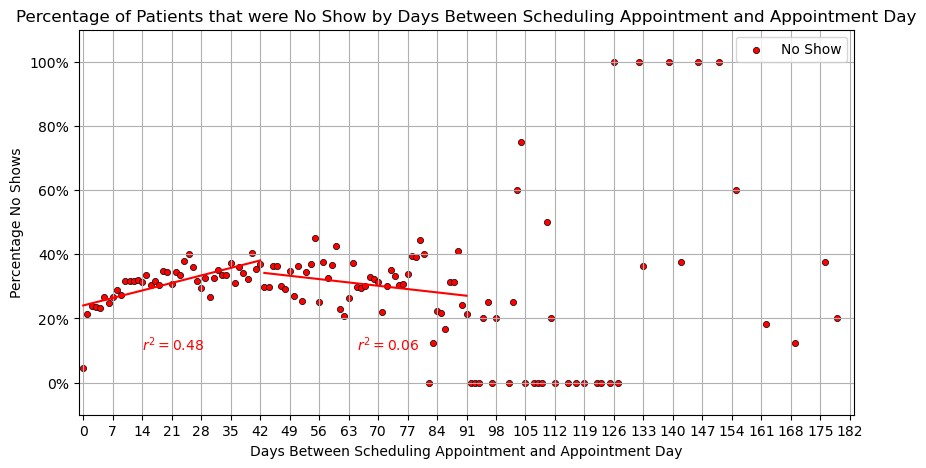

In [44]:
# Scatter plot 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
xticks = np.arange(0,190,7).tolist()
no_shows_by_days_between.plot(ax = ax,
        kind = 'scatter', 
        x = 'Days_Between',
        y = 'No_Show_Proportion', 
        xlabel = 'Days Between Scheduling Appointment and Appointment Day',
        ylabel = 'Percentage No Shows',
        title = 'Percentage of Patients that were No Show by Days Between Scheduling Appointment and Appointment Day',
        edgecolor = 'black',
        linewidth = 0.5,
        xlim = [-1,183],
        xticks = xticks,
        grid = True,
        color = 'red',
        label = 'No Show'
        )

# Find regression model using linregress
# Break linear regression into three segments from observation of the data
# Days_Between <=42
xdata = no_shows_by_days_between[no_shows_by_days_between['Days_Between']<=42]['Days_Between']
ydata = no_shows_by_days_between[no_shows_by_days_between['Days_Between']<=42]['No_Show_Proportion']
slope, intercept, rvalue, pvalue, stderr = linregress(xdata, ydata) 
r_squared = rvalue*rvalue # The square of rvalue is equal to the coefficient of determination
ylinreg = slope*xdata + intercept # regression values
ax.plot(xdata, ylinreg, '-r')
ax.text(14,.1,'$r^2 = %0.2f$'% r_squared, fontsize = 10, color='red')
# Days_Between >42 and <=91
xdata = no_shows_by_days_between[(no_shows_by_days_between['Days_Between']>42) & (no_shows_by_days_between['Days_Between']<=91)]['Days_Between']
ydata = no_shows_by_days_between[(no_shows_by_days_between['Days_Between']>42) & (no_shows_by_days_between['Days_Between']<=91)]['No_Show_Proportion']
slope, intercept, rvalue, pvalue, stderr = linregress(xdata, ydata) 
r_squared = rvalue*rvalue # The square of rvalue is equal to the coefficient of determination
ylinreg = slope*xdata + intercept # regression values
ax.plot(xdata, ylinreg, '-r')
ax.text(65,.1,'$r^2 = %0.2f$'% r_squared, fontsize = 10, color='red')

# Change format of yticks to percentages
vals = ax.get_yticks() 
ax.set_yticks(vals)
ax.set_yticklabels(['{:,.0%}'.format(ytick) for ytick in vals])
ax.set_ylim([-.1,1.1])

# Save the figure
plt.savefig("output/No_shows_by_days_between_scatter.png")
# Show figure
plt.show()

In [45]:
# Bin data into week increments for another scatterplot

# Establish the bins
bins = np.arange(0,183,7).tolist()
midpoints = np.arange(3.5,183,7).tolist()
no_shows_by_days_between_binned_temp = no_shows_by_days_between.copy()
# Use `pd.cut` to categorize Days_Between based on the bins.
no_shows_by_days_between_binned_temp['Days_Between_Binned'] = pd.cut(no_shows_by_days_between_binned_temp['Days_Between'], 
                                                             bins = bins, 
                                                             #labels = labels, 
                                                             include_lowest = True,
                                                             right = True)
#  Calculate averages for the no show and attended proportions.
columns_to_avg = ['No_Show_Proportion','Attended_Proportion']
no_shows_by_days_between_binned = no_shows_by_days_between_binned_temp.groupby(['Days_Between_Binned'], observed = False)
no_shows_by_days_between_binned = no_shows_by_days_between_binned[columns_to_avg].mean().round(2)
no_shows_by_days_between_binned['Midpoint'] = midpoints
no_shows_by_days_between_binned = no_shows_by_days_between_binned.reset_index()
no_shows_by_days_between_binned

,Days_Between_Binned,No_Show_Proportion,Attended_Proportion,Midpoint
0,"(-0.001, 7.0]",0.22,0.78,3.5
1,"(7.0, 14.0]",0.31,0.69,10.5
2,"(14.0, 21.0]",0.32,0.68,17.5
3,"(21.0, 28.0]",0.35,0.65,24.5
4,"(28.0, 35.0]",0.33,0.67,31.5
5,"(35.0, 42.0]",0.35,0.65,38.5
6,"(42.0, 49.0]",0.32,0.68,45.5
7,"(49.0, 56.0]",0.33,0.67,52.5
8,"(56.0, 63.0]",0.31,0.69,59.5
9,"(63.0, 70.0]",0.32,0.68,66.5


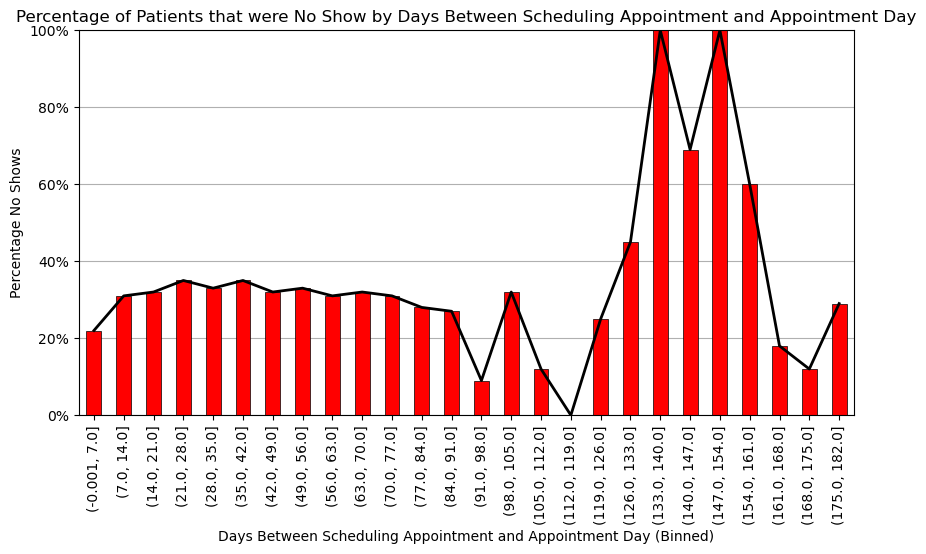

In [46]:
# Bar plot proportion of no shows by days between scheduliing appointment and appointment day
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
no_shows_by_days_between_binned.plot(ax = ax,
        kind = 'bar', 
        x = 'Days_Between_Binned',
        y = 'No_Show_Proportion', 
        edgecolor = 'black',
        linewidth = 0.5,
        color = 'red',
        #label = 'No Show',
        #xlim = [-1,191],
        #ylim = [0,1],
        #grid = True,
        #xlabel = 'Days Between Scheduling Appointment and Appointment Day (Binned)',
        #ylabel = 'Percentage of No Shows',
        #title = 'Percentage of Patients No Show by Days Between Scheduling Appointment and Appointment Day',
        )

# Add line graph for visual appeal
no_shows_by_days_between_binned.plot(ax = ax,
        kind = 'line', 
        x = 'Days_Between_Binned',
        y = 'No_Show_Proportion', 
        linewidth = 2,
        color = 'black',
        #label = 'No Show',
        #xlim = [-1,191],
        ylim = [0,1],
        rot = 90,
        #grid = True,
        xlabel = 'Days Between Scheduling Appointment and Appointment Day (Binned)',
        ylabel = 'Percentage No Shows',
        title = 'Percentage of Patients that were No Show by Days Between Scheduling Appointment and Appointment Day',
        )
ax.grid(axis='y')
ax.set_axisbelow(True)

# Change format of yticks to percentages
vals = ax.get_yticks() 
ax.set_yticks(vals)
ax.set_yticklabels(['{:,.0%}'.format(ytick) for ytick in vals])
ax.set_ylim([0,1])

# Remove legend
ax.get_legend().remove()

# Save the figure
plt.savefig("output/No_shows_by_days_betwen_bar.png")
# Show figure
plt.show()

### No Shows by Appointment Day of Week
Is there a day of the week that has a higher volume of missed appointments? Is it more likely that appointments on Friday or Saturday have a higher proportion of no shows than midweek days?

Conclusions: 
- Friday and Saturday have the highest percentages of no shows.
- Monday through Thursday have lower percentages of no shows, with the proportion of missed appointments decreasing as the week progresses. So Thursday seems to be the best day to schedule an appointment if you want to have the highest likelihood of not becoming a no show!

In [47]:
# Number of patients that had appointment by day of week
appt_day_of_week = df.groupby('Appointment_Day_of_Week')['Patient_ID'].count().reset_index()
appt_day_of_week.rename(columns={'Patient_ID':'Patient_Count'},inplace=True)
appt_day_of_week = appt_day_of_week.reindex(index=[1,4,5,3,0,2]).reset_index() # reorder rows 
appt_day_of_week.drop(columns=['index'], inplace=True) # remove old index
appt_day_of_week


,Appointment_Day_of_Week,Patient_Count
0,Monday,22714
1,Tuesday,25640
2,Wednesday,25867
3,Thursday,17247
4,Friday,19019
5,Saturday,39


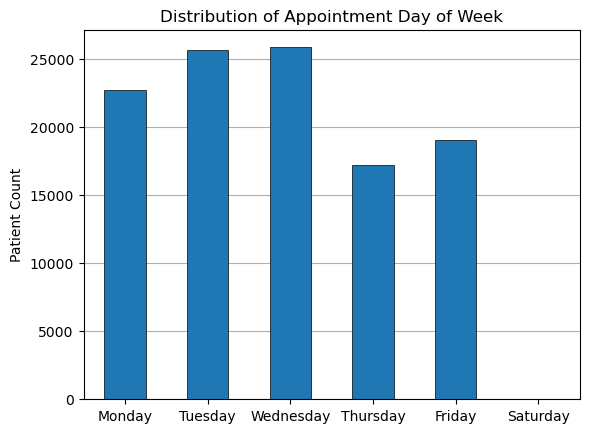

In [48]:
# Distribution of appointment day of week
ax = appt_day_of_week.plot(kind = 'bar',
        x = 'Appointment_Day_of_Week',
        y = 'Patient_Count', 
        xlabel = '',
        ylabel = 'Patient Count',
        title = 'Distribution of Appointment Day of Week',
        edgecolor = 'black',
        linewidth = 0.5,
        rot = 0,
        #xlim = [-1,70],
        #xticks = xticks,
        #bins = bins,
        )
ax.grid(axis='y')
ax.set_axisbelow(True)

# Remove legend
ax.get_legend().remove()

# Save the figure
plt.savefig("output/Appointment_day_of_week_distribution.png")
# Show figure
plt.show()

In [49]:
# Find proportion of no shows by appointment day of week
no_shows_by_appt_day_of_week = df.groupby('Appointment_Day_of_Week')['No_Show_Boolean'].mean().reset_index()
no_shows_by_appt_day_of_week.rename(columns={'No_Show_Boolean':'No_Show_Proportion'},inplace=True)
no_shows_by_appt_day_of_week['Attended_Proportion'] = 1-no_shows_by_appt_day_of_week['No_Show_Proportion']
no_shows_by_appt_day_of_week = no_shows_by_appt_day_of_week.reindex(index=[1,4,5,3,0,2]).reset_index() # reorder rows 
no_shows_by_appt_day_of_week.drop(columns=['index'], inplace=True) # remove old index
no_shows_by_appt_day_of_week

,Appointment_Day_of_Week,No_Show_Proportion,Attended_Proportion
0,Monday,0.206481,0.793519
1,Tuesday,0.200936,0.799064
2,Wednesday,0.196892,0.803108
3,Thursday,0.193541,0.806459
4,Friday,0.212261,0.787739
5,Saturday,0.230769,0.769231


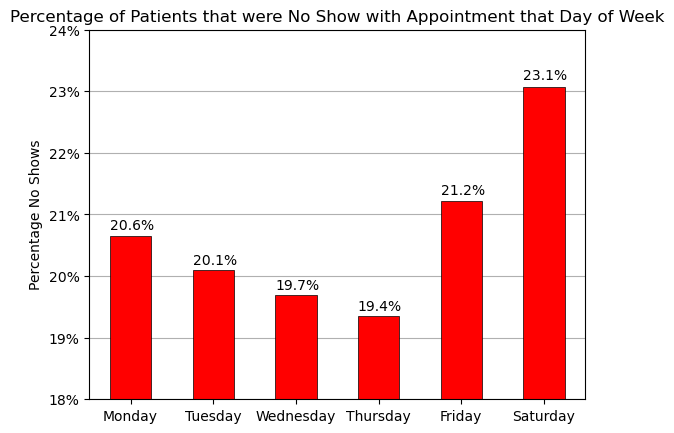

In [50]:
# Bar plot of no shows by appointment day of week
ax = no_shows_by_appt_day_of_week.plot(kind = 'bar', 
        # stacked = True,
        x = 'Appointment_Day_of_Week',
        y = 'No_Show_Proportion',
        xlabel = '',
        ylabel = 'Percentage No Shows',
        title = 'Percentage of Patients that were No Show with Appointment that Day of Week',
        edgecolor = 'black',
        color = 'red',
        linewidth = 0.5,
        rot = 0,
        ylim = [0.18,0.24],
        #yticks=[.18,.19,.20,.21,.22,.23,.24]
        )
# horizontal grid lines
ax.grid(axis='y') 
ax.set_axisbelow(True)

# Change format of yticks to percentages
vals = ax.get_yticks()
ax.set_yticks(vals)
ax.set_yticklabels(['{:,.0%}'.format(ytick) for ytick in vals])

# Label bar heights
for p in ax.patches:
    ax.annotate(str(round(p.get_height()*100,1)) + '%', (p.get_x(), p.get_height() * 1.005))

# Remove legend
ax.get_legend().remove()

# Save the figure
plt.savefig("output/No_shows_by_appointment_day_of_week.png")
# Show figure
plt.show()

### No Shows by Appointment Month
Is there a month of the year (or season in general) that has a higher volume of missed appointments? Is it more likely that appointments in the summer have a higher proportion of no shows than appointments in the fall, spring, and winter?

It turns out there is not enough data in the dataset for this analysis, since the appointments only span three months (April, May, June). This will bias towards the shorter Days_Between for the months at the end of the time period, which is going to bias towards a smaller no show percentage for months at the end of the time period. 

In [51]:
# Number of patients that had appointment that month
appt_month = df.groupby('Appointment_Month')['Patient_ID'].count().reset_index()
appt_month.rename(columns={'Patient_ID':'Patient_Count'},inplace=True)
appt_month

,Appointment_Month,Patient_Count
0,4,3235
1,5,80841
2,6,26450


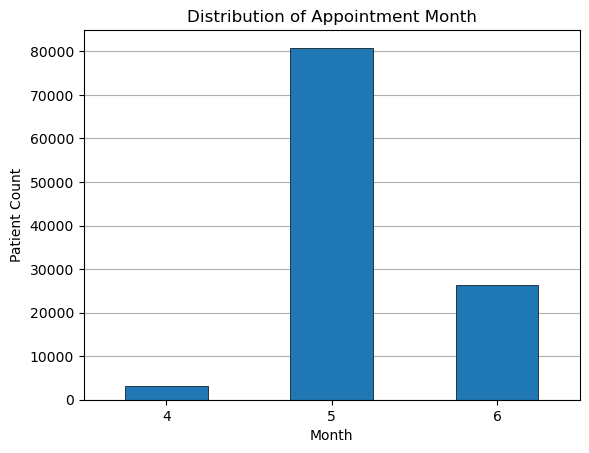

In [52]:
# Distribution of appointment month
ax = appt_month.plot(kind = 'bar',
        x = 'Appointment_Month',
        y = 'Patient_Count', 
        xlabel = 'Month',
        ylabel = 'Patient Count',
        title = 'Distribution of Appointment Month',
        edgecolor = 'black',
        linewidth = 0.5,
        rot = 0,
        #xlim = [-1,70],
        #xticks = xticks,
        #bins = bins,
        )
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.get_legend().remove()
plt.show()

In [53]:
# Find proportion of no shows by appointment month
no_shows_by_appt_month = df.groupby('Appointment_Month')['No_Show_Boolean'].mean().reset_index()
no_shows_by_appt_month.rename(columns={'No_Show_Boolean':'No_Show_Proportion'},inplace=True)
no_shows_by_appt_month['Attended_Proportion'] = 1-no_shows_by_appt_month['No_Show_Proportion']
no_shows_by_appt_month

,Appointment_Month,No_Show_Proportion,Attended_Proportion
0,4,0.195672,0.804328
1,5,0.207865,0.792135
2,6,0.184575,0.815425


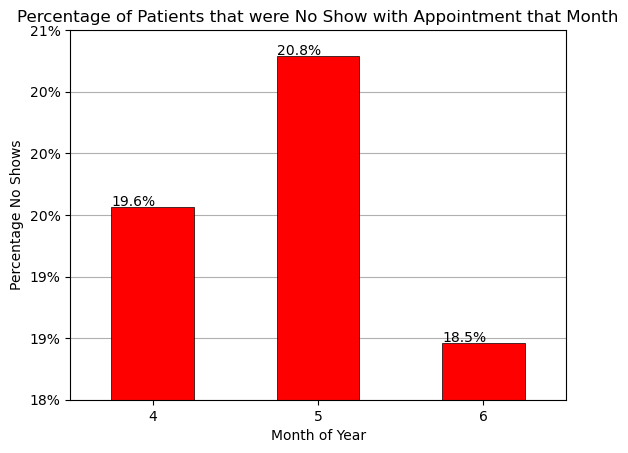

In [54]:
# Bar plot of no shows by appointment month
ax = no_shows_by_appt_month.plot(kind = 'bar', 
        stacked = True,
        x = 'Appointment_Month',
        y = 'No_Show_Proportion',
        xlabel = 'Month of Year',
        ylabel = 'Percentage No Shows',
        title = 'Percentage of Patients that were No Show with Appointment that Month',
        edgecolor = 'black',
        color = 'red',
        linewidth = 0.5,
        rot = 0,
        ylim = [0.18,0.21],
        #yticks=[.18,.19,.20,.21,.22,.23,.24]
        )
# horizontal grid lines
ax.grid(axis='y') 
ax.set_axisbelow(True)

# Change format of yticks to percentages
vals = ax.get_yticks()
ax.set_yticks(vals)
ax.set_yticklabels(['{:,.0%}'.format(ytick) for ytick in vals])

# Label bar heights
for p in ax.patches:
    ax.annotate(str(round(p.get_height()*100,1)) + '%', (p.get_x(), p.get_height() * 1.0005))

# Remove legend
ax.get_legend().remove()

plt.show()

### No Shows by Scheduling Day of Week
Does the day of week that an appointment is scheduled impact the chances of the patient showing up?

Conclusions:
- For Monday-Friday, the day of week that the appointment is scheduled does not seem to affect the cahnces of the patient showing up.
- However, for appointments scheduled on Saturday, there is a very small chance of no shows. It does not appear that Saturday has more same day appointments, so I am unsure of why appointments scheduled on Saturday have less chance of being missed.

In [55]:
# Number of patients that scheduled on day of week
scheduled_day_of_week = df.groupby('Scheduled_Day_of_Week')['Patient_ID'].count().reset_index()
scheduled_day_of_week.rename(columns={'Patient_ID':'Patient_Count'},inplace=True)
scheduled_day_of_week = scheduled_day_of_week.reindex(index=[1,4,5,3,0,2]).reset_index() # reorder rows 
scheduled_day_of_week.drop(columns=['index'], inplace=True) # remove old index
scheduled_day_of_week


,Scheduled_Day_of_Week,Patient_Count
0,Monday,23084
1,Tuesday,26168
2,Wednesday,24262
3,Thursday,18073
4,Friday,18915
5,Saturday,24


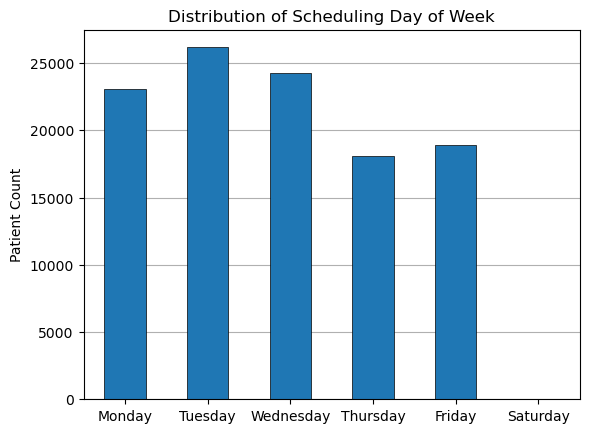

In [56]:
# Distribution of scheduled day of week
ax = scheduled_day_of_week.plot(kind = 'bar',
        x = 'Scheduled_Day_of_Week',
        y = 'Patient_Count', 
        xlabel = '',
        ylabel = 'Patient Count',
        title = 'Distribution of Scheduling Day of Week',
        edgecolor = 'black',
        linewidth = 0.5,
        rot = 0,
        #xlim = [-1,70],
        #xticks = xticks,
        #bins = bins,
        )
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.get_legend().remove()

# Save the figure
plt.savefig("output/Scheduling_day_of_week_distribution.png")
# Show figure
plt.show()

In [57]:
# Find proportion of no shows by scheduling day of week
no_shows_by_scheduled_day_of_week = df.groupby('Scheduled_Day_of_Week')['No_Show_Boolean'].mean().reset_index()
no_shows_by_scheduled_day_of_week.rename(columns={'No_Show_Boolean':'No_Show_Proportion'},inplace=True)
no_shows_by_scheduled_day_of_week['Attended_Proportion'] = 1-no_shows_by_scheduled_day_of_week['No_Show_Proportion']
no_shows_by_scheduled_day_of_week = no_shows_by_scheduled_day_of_week.reindex(index=[1,4,5,3,0,2]).reset_index() # reorder rows 
no_shows_by_scheduled_day_of_week.drop(columns=['index'], inplace=True) # remove old index
no_shows_by_scheduled_day_of_week

,Scheduled_Day_of_Week,No_Show_Proportion,Attended_Proportion
0,Monday,0.197583,0.802417
1,Tuesday,0.202194,0.797806
2,Wednesday,0.201096,0.798904
3,Thursday,0.204725,0.795275
4,Friday,0.205498,0.794502
5,Saturday,0.041667,0.958333


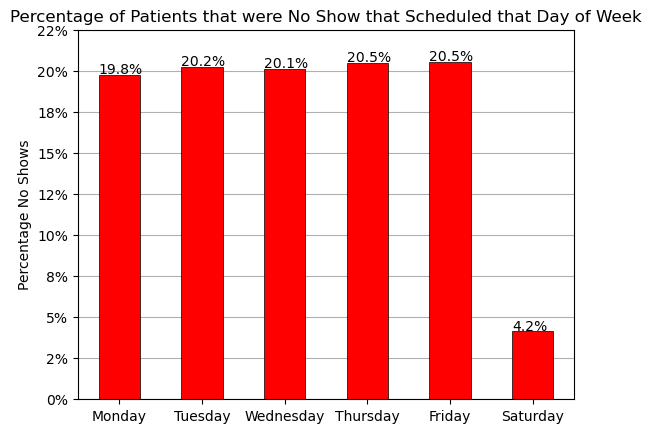

In [58]:
# Bar plot of no shows by scheduling day of week
ax = no_shows_by_scheduled_day_of_week.plot(kind = 'bar', 
        #stacked = True,
        x = 'Scheduled_Day_of_Week',
        y = 'No_Show_Proportion',
        xlabel = '',
        ylabel = 'Percentage No Shows',
        title = 'Percentage of Patients that were No Show that Scheduled that Day of Week',
        edgecolor = 'black',
        color = 'red',
        linewidth = 0.5,
        rot = 0,
        ylim = [0,.21],
        #yticks=[.18,.19,.20,.21,.22,.23,.24]
        )
# horizontal grid lines
ax.grid(axis='y') 
ax.set_axisbelow(True)

# change format of yticks to percentages
vals = ax.get_yticks()
ax.set_yticks(vals)
ax.set_yticklabels(['{:,.0%}'.format(ytick) for ytick in vals])

# Label bar heights
for p in ax.patches:
    ax.annotate(str(round(p.get_height()*100,1)) + '%', (p.get_x(), p.get_height() * 1.005))

# Remove legend
ax.get_legend().remove()

# Save the figure
plt.savefig("output/No_shows_by_scheduling_day_of_week.png")
# Show figure
plt.show()

In [59]:
# Find aveage days between for scheduled day of week
# This is done to investigate why scheduling Saturday gives a lower percenage of no shows
days_between_by_scheduled_day_of_week = df.groupby('Scheduled_Day_of_Week')['Days_Between'].mean().reset_index()
days_between_by_scheduled_day_of_week

,Scheduled_Day_of_Week,Days_Between
0,Friday,10.854718
1,Monday,9.529241
2,Saturday,10.916667
3,Thursday,9.751065
4,Tuesday,10.713658
5,Wednesday,10.034457


In [60]:
# Find proporiton of same day appointments by day of week
# This is done to investigate why scheduling Saturday gives a lower percenage of no shows
same_day_appt_by_day_of_week = df[df['Days_Between']==0]['Scheduled_Day_of_Week'].value_counts()
num_sched_appt_by_day_of_week = df['Scheduled_Day_of_Week'].value_counts()
same_day_appt_by_day_of_week/num_sched_appt_by_day_of_week

Scheduled_Day_of_Week
Tuesday      0.350657
Wednesday    0.363614
Monday       0.352279
Friday       0.343801
Thursday     0.327616
Saturday     0.333333
Name: count, dtype: float64

Saturday does no have a greater proportion of same-day appointments or fewer days between scheduling and appointment.

### No Shows by Scheduling Hour of Day
Does the time of day that an appointment is scheduled impact the chances of the patient showing up?

Conclusions: 
- In general, shceduling appointments earlier in the day results in a smaller chance of missing the appointment.
- Scheduling appointments late in the day greatly increases the chance of missing the appointment in the future.
- This suggests that in the moring people typically have a better idea of their future schedules.

In [61]:
# Number of patients that scheduled that hour
scheduled_hour = df.groupby('Scheduled_Hour')['Patient_ID'].count().reset_index()
scheduled_hour.rename(columns={'Patient_ID':'Patient_Count'},inplace=True)
scheduled_hour

,Scheduled_Hour,Patient_Count
0,6,1578
1,7,19213
2,8,15348
3,9,12823
4,10,11056
5,11,8462
6,12,5422
7,13,9036
8,14,9127
9,15,8079


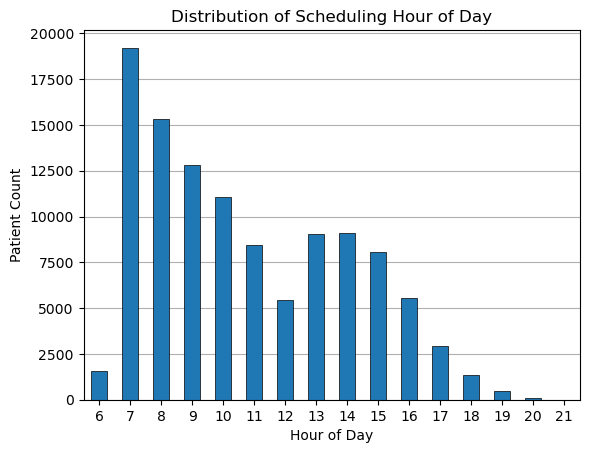

In [62]:
# Distribution of scheduled hour of day
ax = scheduled_hour.plot(kind = 'bar',
        x = 'Scheduled_Hour',
        y = 'Patient_Count', 
        xlabel = 'Hour of Day',
        ylabel = 'Patient Count',
        title = 'Distribution of Scheduling Hour of Day',
        edgecolor = 'black',
        linewidth = 0.5,
        rot = 0,
        #xlim = [-1,70],
        #xticks = xticks,
        #bins = bins,
        )
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.get_legend().remove()

# Save the figure
plt.savefig("output/Scheduling_hour_distribution.png")
# Show figure
plt.show()

In [63]:
# Find proportion of no shows by scheduling hour
no_shows_by_scheduled_hour = df.groupby('Scheduled_Hour')['No_Show_Boolean'].mean().reset_index()
no_shows_by_scheduled_hour.rename(columns={'No_Show_Boolean':'No_Show_Proportion'},inplace=True)
no_shows_by_scheduled_hour['Attended_Proportion'] = 1-no_shows_by_scheduled_hour['No_Show_Proportion']
no_shows_by_scheduled_hour

,Scheduled_Hour,No_Show_Proportion,Attended_Proportion
0,6,0.192015,0.807985
1,7,0.151512,0.848488
2,8,0.182695,0.817305
3,9,0.196990,0.803010
4,10,0.220695,0.779305
5,11,0.227842,0.772158
6,12,0.203615,0.796385
7,13,0.209274,0.790726
8,14,0.226800,0.773200
9,15,0.231836,0.768164


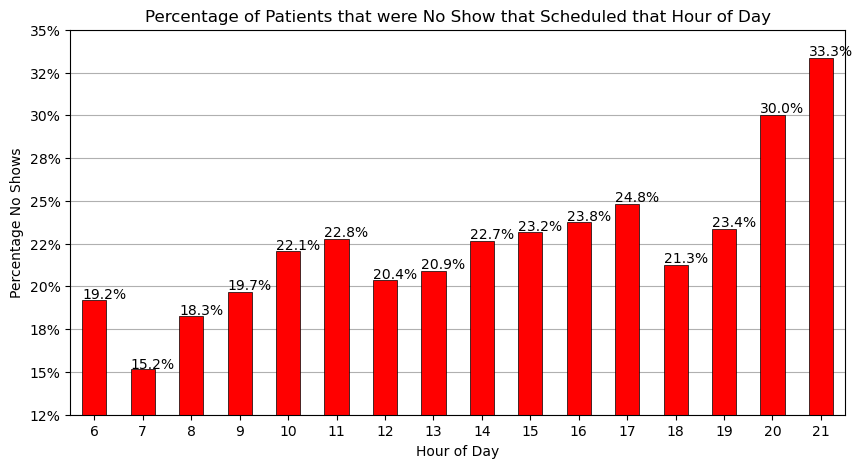

In [64]:
# Bar plot of no shows by scheduling hour
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax = no_shows_by_scheduled_hour.plot(ax = ax,
        kind = 'bar', 
        #stacked = True,
        x = 'Scheduled_Hour',
        y = 'No_Show_Proportion',
        xlabel = 'Hour of Day',
        ylabel = 'Percentage No Shows',
        title = 'Percentage of Patients that were No Show that Scheduled that Hour of Day',
        edgecolor = 'black',
        color = 'red',
        linewidth = 0.5,
        rot = 0,
        ylim = [.14,.34],
        #yticks=[.18,.19,.20,.21,.22,.23,.24]
        )
# Horizontal grid lines
ax.grid(axis='y') 
ax.set_axisbelow(True)

# Change format of yticks to percentages
vals = ax.get_yticks()
ax.set_yticks(vals)
ax.set_yticklabels(['{:,.0%}'.format(ytick) for ytick in vals])

# Label bar heights
for p in ax.patches:
    ax.annotate(str(round(p.get_height()*100,1)) + '%', (p.get_x(), p.get_height() * 1.005))

# Remove legend
ax.get_legend().remove()

# Save the figure
plt.savefig("output/No_shows_by_scheduling_hour.png")
# Show figure
plt.show()

### No Shows by Scheduling Month
Does the month of year that an appointment is scheduled impact the chances of the patient showing up?

It turns out there is not enough data in the dataset for this analysis, since the appointments only span three months (April, May, June). This will bias towards the shorter Days_Between for the months at the end of the time period, which is going to bias towards a smaller no show percentage for months at the end of the time period. 

In [65]:
# Number of patients that scheduled that month
scheduled_month = df.groupby('Scheduled_Month')['Patient_ID'].count().reset_index()
scheduled_month.rename(columns={'Patient_ID':'Patient_Count'},inplace=True)
scheduled_month

,Scheduled_Month,Patient_Count
0,1,60
1,2,281
2,3,3614
3,4,25339
4,5,67421
5,6,13749
6,11,1
7,12,61


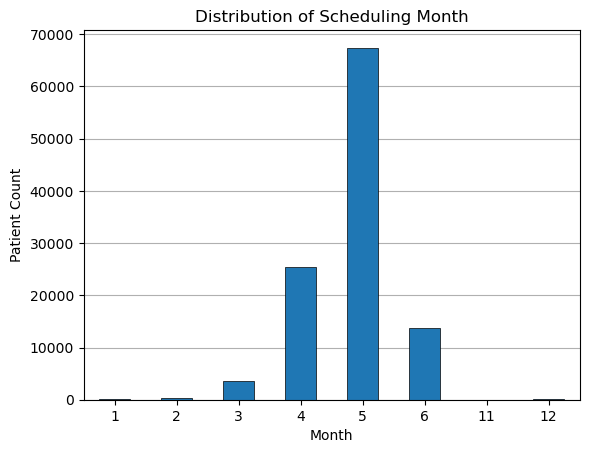

In [66]:
# Distribution of scheduled hour of day
ax = scheduled_month.plot(kind = 'bar',
        x = 'Scheduled_Month',
        y = 'Patient_Count', 
        xlabel = 'Month',
        ylabel = 'Patient Count',
        title = 'Distribution of Scheduling Month',
        edgecolor = 'black',
        linewidth = 0.5,
        rot = 0,
        #xlim = [-1,70],
        #xticks = xticks,
        #bins = bins,
        )
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.get_legend().remove()
plt.show()

In [67]:
# Find proportion of no shows by scheduling month
no_shows_by_scheduled_month = df.groupby('Scheduled_Month')['No_Show_Boolean'].mean().reset_index()
no_shows_by_scheduled_month.rename(columns={'No_Show_Boolean':'No_Show_Proportion'},inplace=True)
no_shows_by_scheduled_month['Attended_Proportion'] = 1-no_shows_by_scheduled_month['No_Show_Proportion']
no_shows_by_scheduled_month

,Scheduled_Month,No_Show_Proportion,Attended_Proportion
0,1,0.300000,0.700000
1,2,0.291815,0.708185
2,3,0.330935,0.669065
3,4,0.309760,0.690240
4,5,0.174560,0.825440
5,6,0.100807,0.899193
6,11,0.000000,1.000000
7,12,0.311475,0.688525


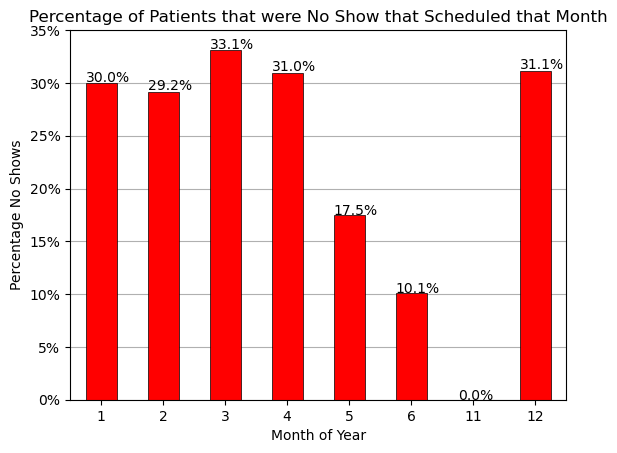

In [68]:
# Bar plot of no shows by scheduling month
ax = no_shows_by_scheduled_month.plot(kind = 'bar', 
        #stacked = True,
        x = 'Scheduled_Month',
        y = 'No_Show_Proportion',
        xlabel = 'Month of Year',
        ylabel = 'Percentage No Shows',
        title = 'Percentage of Patients that were No Show that Scheduled that Month',
        edgecolor = 'black',
        color = 'red',
        linewidth = 0.5,
        rot = 0,
        ylim = [0,.35],
        #yticks=[.18,.19,.20,.21,.22,.23,.24]
        )
# Horizontal grid lines
ax.grid(axis='y') 
ax.set_axisbelow(True)

# Change format of yticks to percentages
vals = ax.get_yticks()
ax.set_yticks(vals)
ax.set_yticklabels(['{:,.0%}'.format(ytick) for ytick in vals])

# Label bar heights
for p in ax.patches:
    ax.annotate(str(round(p.get_height()*100,1)) + '%', (p.get_x(), p.get_height() * 1.005))

# Remove legend
ax.get_legend().remove()

plt.show()

## Patients with Multiple Appointments

[ AUTHOR = ROSS ]

Conclusions:
- Most patients had 1-10 appointments during the time frame.
- A few had up to 88 appointments
- For our analyis we treated each appointment independent of the patient. A further study could remove patients with more than 10 appointments but this would probably have little effect on the results.

In [69]:
# Check for multiple appointments for patients
patient_count = df["Patient_ID"].nunique()
appointment_count = df["Appointment_ID"].nunique()

print(patient_count)
print(appointment_count)

62298
110526


In [70]:
# Number of patients with # of visits = 1, 2, 3, ...
patient_summary = df.groupby(['Patient_ID'])['Appointment_ID'].count().reset_index(name='#_of_Visits')
visit_summary = patient_summary.groupby(['#_of_Visits'])['Patient_ID'].count().reset_index(name='Patient_count')
visit_summary

,#_of_Visits,Patient_count
0,1,37919
1,2,13895
2,3,5500
3,4,2367
4,5,1119
5,6,553
6,7,306
7,8,202
8,9,104
9,10,85


In [71]:
# Add percent column
total = visit_summary['Patient_count'].sum()
visit_summary['Percent_of_total'] = visit_summary['Patient_count']*100 / total

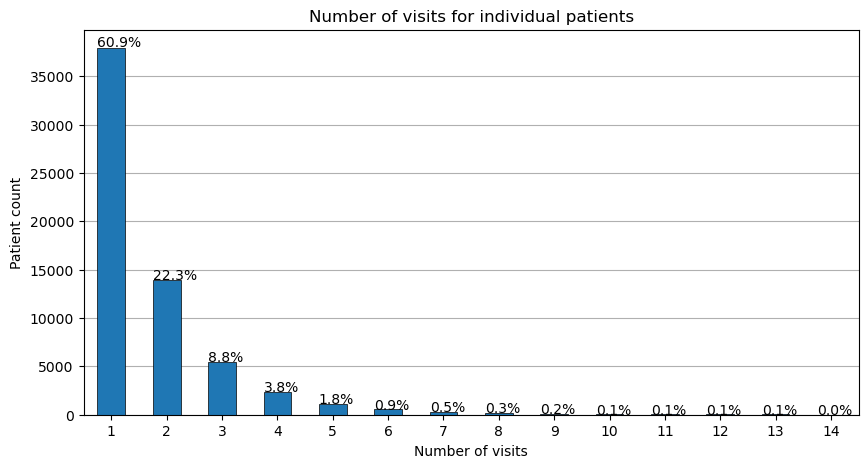

In [72]:
# Bar plot 1 - by Steph
# Graph the number if visits that patients had in 2016
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax = visit_summary.plot(ax=ax,
        kind = 'bar', 
        x = '#_of_Visits',
        y = 'Patient_count',
        xlabel = 'Number of visits',
        ylabel = 'Patient count',
        title = 'Number of visits for individual patients',
        edgecolor = 'black',
        #color = 'blue',
        linewidth = 0.5,
        rot = 0,
        )
# Horizontal grid lines
ax.grid(axis='y') 
ax.set_axisbelow(True)

# Label bar heights
i = 0
for p in ax.patches:
    ax.annotate(str(round(visit_summary['Percent_of_total'][i],1)) + '%', (p.get_x(), p.get_height() * 1.005))
    i += 1

ax.set_xlim([-0.5,13.5])

# Remove legend
ax.get_legend().remove()

# Save the figure
plt.savefig("output/Number_of_visits.png")
# Show figure
plt.show()

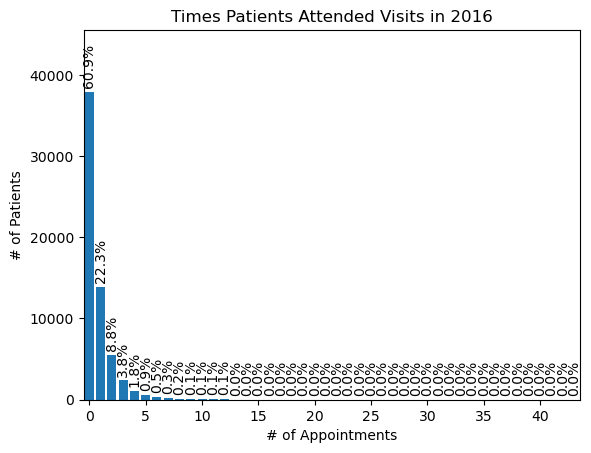

In [73]:
# Bar plot 2 - by Ross
# Graph the number if visits that patients had in 2016
categories = visit_summary.index
values = visit_summary['Patient_count']
percentages = visit_summary['Percent_of_total']

# Create the bar chart
fig, ax = plt.subplots()
bars = ax.bar(categories, values)
ax.set_xlim(-0.5, len(categories) - 0.5)  # Add padding on both sides
ax.set_ylim(0, max(values) * 1.2)  # Extend by 20%

# Add percentage labels
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                rotation=90,
                ha='center', va='bottom')

# Add labels and title
ax.set_xlabel('# of Appointments')
ax.set_ylabel('# of Patients')
ax.set_title('Times Patients Attended Visits in 2016')

# Save the figure
plt.savefig("output/num_visits_per_patient_2.png")
# Show figure
plt.show()